In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plots of data distribution

In [2]:
from dataset import read_IAM_label_txt_file

In [3]:
file_txt_labels = "/home/abhishek/Desktop/RUG/hw_recognition/IAM-data/iam_lines_gt.txt"

In [4]:
_, all_labels = read_IAM_label_txt_file(file_txt_labels)

In [5]:
dict_label_words = {}
dict_label_lengths = {}
dict_char_counts = {}

In [6]:
for label in all_labels:
    length_label = len(label)
    if length_label in dict_label_lengths:
        dict_label_lengths[length_label] += 1
    else:
        dict_label_lengths[length_label] = 1
       
    num_words = len(label.split(" "))
    if num_words in dict_label_words:
        dict_label_words[num_words] += 1
    else:
        dict_label_words[num_words] = 1
        
    for c_char in label:
        if c_char in dict_char_counts:
            dict_char_counts[c_char] += 1
        else:
            dict_char_counts[c_char] = 1

In [7]:
all_labels[0:5]

['into the pro-communist north and the',
 'to 1958 kept the kingdom in peace, though',
 'pro-western centre and south.',
 'in Phnom Penh indicate that he still regards',
 'at the cost of virtual partition of the country']

In [8]:
arr_length_counts = np.array([list(dict_label_lengths.keys()), list(dict_label_lengths.values())]).T

In [9]:
df_length_counts = pd.DataFrame(arr_length_counts, columns=["lengths", "counts"])

In [10]:
df_length_counts = df_length_counts.sort_values(by="lengths")

In [11]:
df_length_counts.head()

,lengths,counts
70,1,1
50,3,3
69,4,1
42,5,9
38,6,13


/tmp/ipykernel_16513/3701880714.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


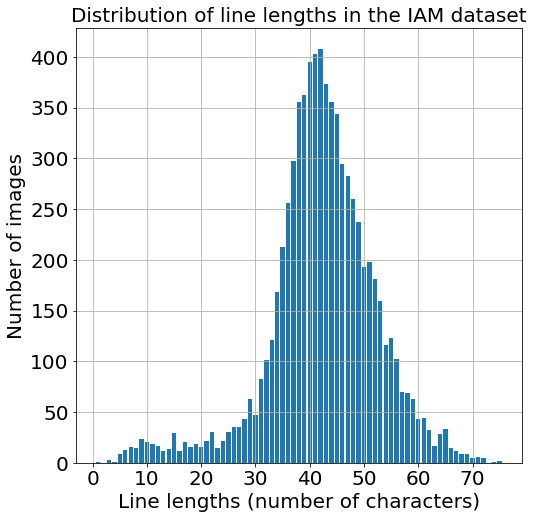

In [12]:
fig = plt.figure(figsize=(8, 8))
plt.bar(df_length_counts.lengths, df_length_counts.counts)
plt.grid()
plt.xlabel("Line lengths (number of characters)", fontsize=20)
plt.ylabel("Number of images", fontsize=20)
plt.title("Distribution of line lengths in the IAM dataset", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.show()

In [13]:
arr_word_counts = np.array([list(dict_label_words.keys()), list(dict_label_words.values())]).T

In [14]:
df_word_counts = pd.DataFrame(arr_word_counts, columns=["num_words", "counts"])

In [15]:
df_word_counts = df_word_counts.sort_values(by="num_words")

In [16]:
df_word_counts.head()

,num_words,counts
9,1,91
8,2,105
7,3,111
2,4,175
6,5,481


/tmp/ipykernel_16513/2620000751.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


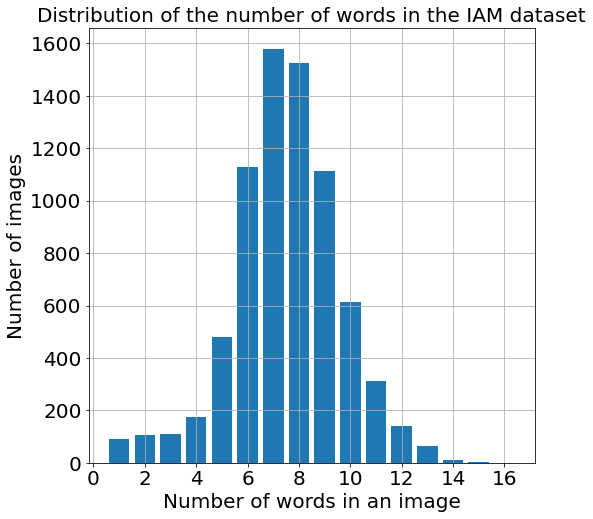

In [17]:
fig = plt.figure(figsize=(8, 8))
plt.bar(df_word_counts.num_words, df_word_counts.counts)
plt.grid()
plt.xlabel("Number of words in an image", fontsize=20)
plt.ylabel("Number of images", fontsize=20)
plt.title("Distribution of the number of words in the IAM dataset", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.show()

In [18]:
arr_char_counts = np.array([list(dict_char_counts.keys()), list(dict_char_counts.values())]).T

In [19]:
df_char_counts = pd.DataFrame(arr_char_counts, 
                              columns=["character", "counts"])

In [20]:
df_char_counts["counts"] = df_char_counts["counts"].astype("int")

In [21]:
df_char_counts = df_char_counts.sort_values(by="counts")

In [22]:
df_char_counts.head()

,character,counts
77,+,2
76,Z,5
71,X,8
75,*,9
65,Q,9


/tmp/ipykernel_16513/4016956778.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


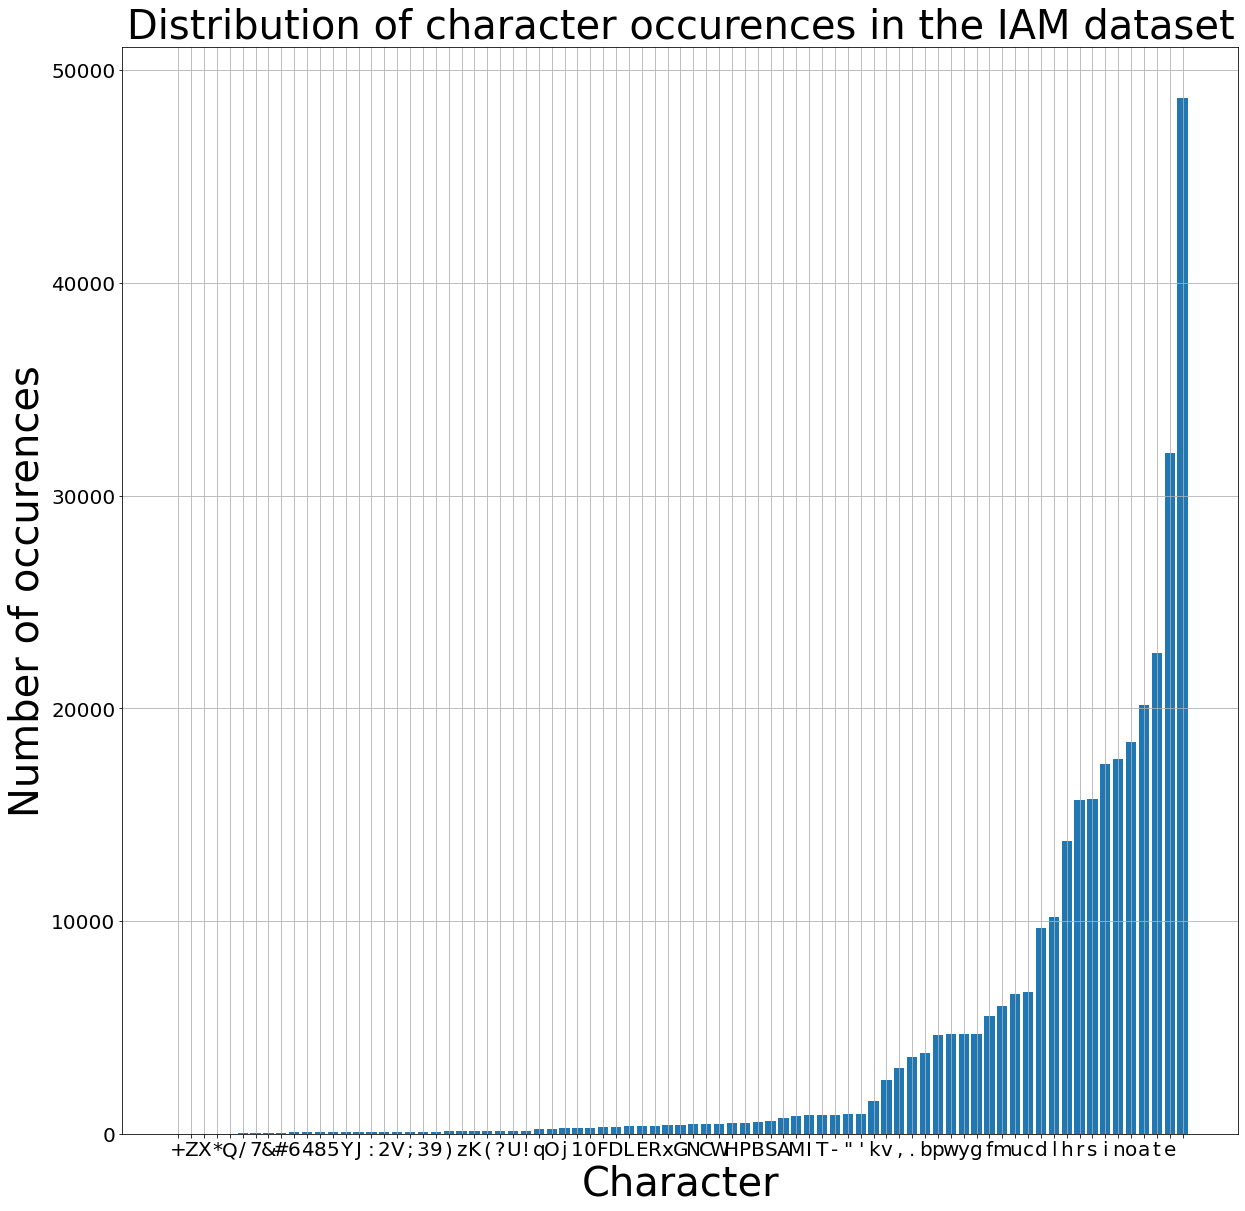

In [23]:
fig = plt.figure(figsize=(20, 20))
plt.bar(df_char_counts.character, df_char_counts.counts)
plt.grid()
plt.xlabel("Character", fontsize=40)
plt.ylabel("Number of occurences", fontsize=40)
plt.title("Distribution of character occurences in the IAM dataset", fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.show()

## Plots of training, model: CNN - BiLSTM

In [24]:
file_metrics_adadelta_crnn = "/home/abhishek/Desktop/RUG/hw_recognition/models_new_shear_params/model_crnn_adadelta/train_metrics.csv"

In [25]:
file_metrics_adam_crnn = "/home/abhishek/Desktop/RUG/hw_recognition/models_new_shear_params/model_crnn_adam/train_metrics.csv"

In [26]:
df_metrics_adadelta_crnn = pd.read_csv(file_metrics_adadelta_crnn)

In [27]:
df_metrics_adam_crnn = pd.read_csv(file_metrics_adam_crnn)

In [28]:
df_metrics_adadelta_crnn.head()

,epoch,loss_train,loss_valid,cer_valid,wer_valid
0,1,3.999700,3.207992,99.5407,100.0000
1,2,3.080750,2.795864,84.8015,102.6867
2,3,2.447875,2.186855,66.1161,100.3224
3,4,1.660074,1.540532,41.6239,86.7256
4,5,1.093383,1.055581,25.9177,69.8587


In [29]:
df_metrics_adam_crnn.head()

,epoch,loss_train,loss_valid,cer_valid,wer_valid
0,1,4.287699,3.197298,99.9936,100.0000
1,2,3.060263,2.761044,82.7987,104.3238
2,3,2.335622,1.782369,54.5132,103.0725
3,4,1.290180,0.932354,23.7729,66.6817
4,5,0.838743,0.681297,17.5585,55.5286


/tmp/ipykernel_16513/878419182.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


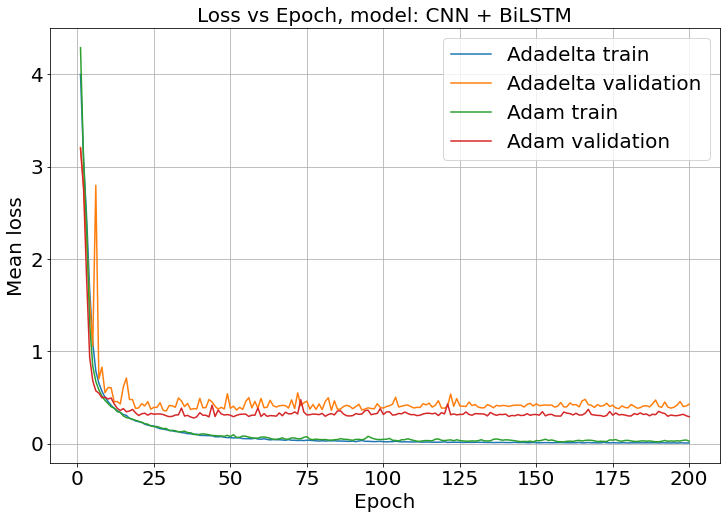

In [30]:
fig = plt.figure(figsize=(12, 8))
x_range = np.arange(1, df_metrics_adadelta_crnn.shape[0]+1)
plt.grid()
plt.plot(x_range, df_metrics_adadelta_crnn.loss_train, label="Adadelta train")
plt.plot(x_range, df_metrics_adadelta_crnn.loss_valid, label="Adadelta validation")
plt.plot(x_range, df_metrics_adam_crnn.loss_train, label="Adam train")
plt.plot(x_range, df_metrics_adam_crnn.loss_valid, label="Adam validation")

plt.legend(fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Mean loss", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Loss vs Epoch, model: CNN + BiLSTM", fontsize=20)
fig.show()

/tmp/ipykernel_16513/262210806.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


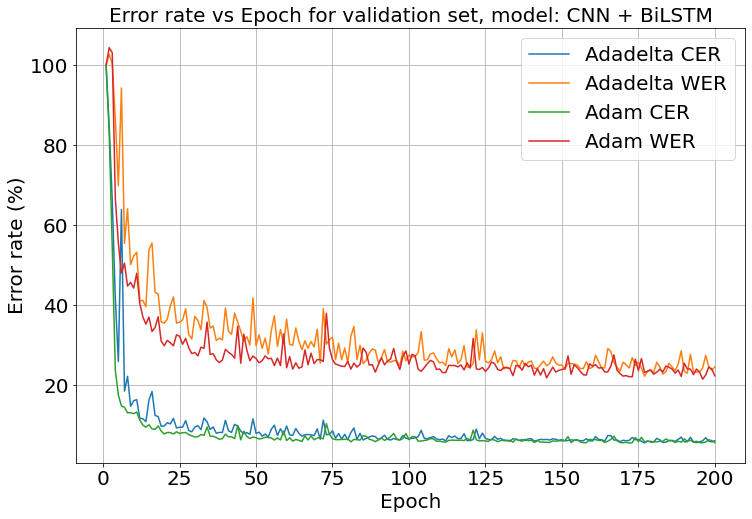

In [31]:
fig = plt.figure(figsize=(12, 8))
x_range = np.arange(1, df_metrics_adadelta_crnn.shape[0]+1)
plt.grid()
plt.plot(x_range, df_metrics_adadelta_crnn.cer_valid, label="Adadelta CER")
plt.plot(x_range, df_metrics_adadelta_crnn.wer_valid, label="Adadelta WER")
plt.plot(x_range, df_metrics_adam_crnn.cer_valid, label="Adam CER")
plt.plot(x_range, df_metrics_adam_crnn.wer_valid, label="Adam WER")
plt.legend(fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Error rate (%)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Error rate vs Epoch for validation set, model: CNN + BiLSTM", fontsize=20)
fig.show()

## Plots of training, model: STN + CNN + BiLSTM

In [32]:
file_metrics_adadelta_stn = "/home/abhishek/Desktop/RUG/hw_recognition/models_new_shear_params/model_stn_crnn_adadelta//train_metrics.csv"

In [33]:
file_metrics_adam_stn = "/home/abhishek/Desktop/RUG/hw_recognition/models_new_shear_params/model_stn_crnn_adam/train_metrics.csv"

In [34]:
df_metrics_adadelta_stn = pd.read_csv(file_metrics_adadelta_stn)

In [35]:
df_metrics_adam_stn = pd.read_csv(file_metrics_adam_stn)

In [36]:
df_metrics_adadelta_stn.head()

,epoch,loss_train,loss_valid,cer_valid,wer_valid
0,1,3.928355,3.197523,99.9107,100.0000
1,2,3.102239,3.002549,85.4102,113.2303
2,3,2.640959,2.301970,81.6663,100.8432
3,4,2.041589,1.752558,55.9979,93.2003
4,5,1.516778,1.947864,56.0654,93.9307


In [37]:
df_metrics_adam_stn.head()

,epoch,loss_train,loss_valid,cer_valid,wer_valid
0,1,4.374746,3.201806,99.9930,100.0000
1,2,3.111536,2.987245,85.4543,105.4337
2,3,2.727585,2.683470,77.1141,107.8877
3,4,2.167695,2.074989,55.5975,95.5732
4,5,1.500815,1.232079,29.0431,74.4118


/tmp/ipykernel_16513/1192148984.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


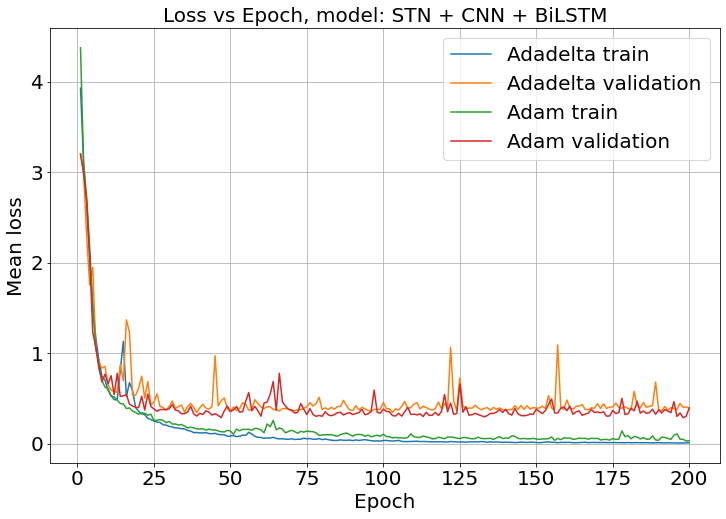

In [38]:
fig = plt.figure(figsize=(12, 8))
x_range = np.arange(1, df_metrics_adadelta_stn.shape[0]+1)
plt.grid()
plt.plot(x_range, df_metrics_adadelta_stn.loss_train, label="Adadelta train")
plt.plot(x_range, df_metrics_adadelta_stn.loss_valid, label="Adadelta validation")
plt.plot(x_range, df_metrics_adam_stn.loss_train, label="Adam train")
plt.plot(x_range, df_metrics_adam_stn.loss_valid, label="Adam validation")

plt.legend(fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Mean loss", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Loss vs Epoch, model: STN + CNN + BiLSTM", fontsize=20)
fig.show()

/tmp/ipykernel_16513/3988010706.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


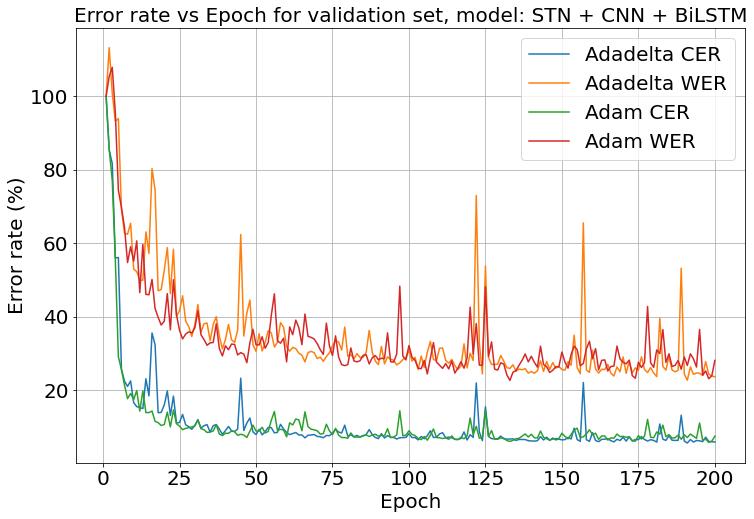

In [39]:
fig = plt.figure(figsize=(12, 8))
x_range = np.arange(1, df_metrics_adadelta_stn.shape[0]+1)
plt.grid()
plt.plot(x_range, df_metrics_adadelta_stn.cer_valid, label="Adadelta CER")
plt.plot(x_range, df_metrics_adadelta_stn.wer_valid, label="Adadelta WER")
plt.plot(x_range, df_metrics_adam_stn.cer_valid, label="Adam CER")
plt.plot(x_range, df_metrics_adam_stn.wer_valid, label="Adam WER")
plt.legend(fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Error rate (%)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Error rate vs Epoch for validation set, model: STN + CNN + BiLSTM", fontsize=20)
fig.show()